In [1]:
from tensorflow.keras import layers, models, utils, datasets
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar dataset
mnist = datasets.mnist

#### Cargar datos

In [3]:
# Cargar datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

y_train[0]

np.uint8(5)

#### Visualizar el Dataset

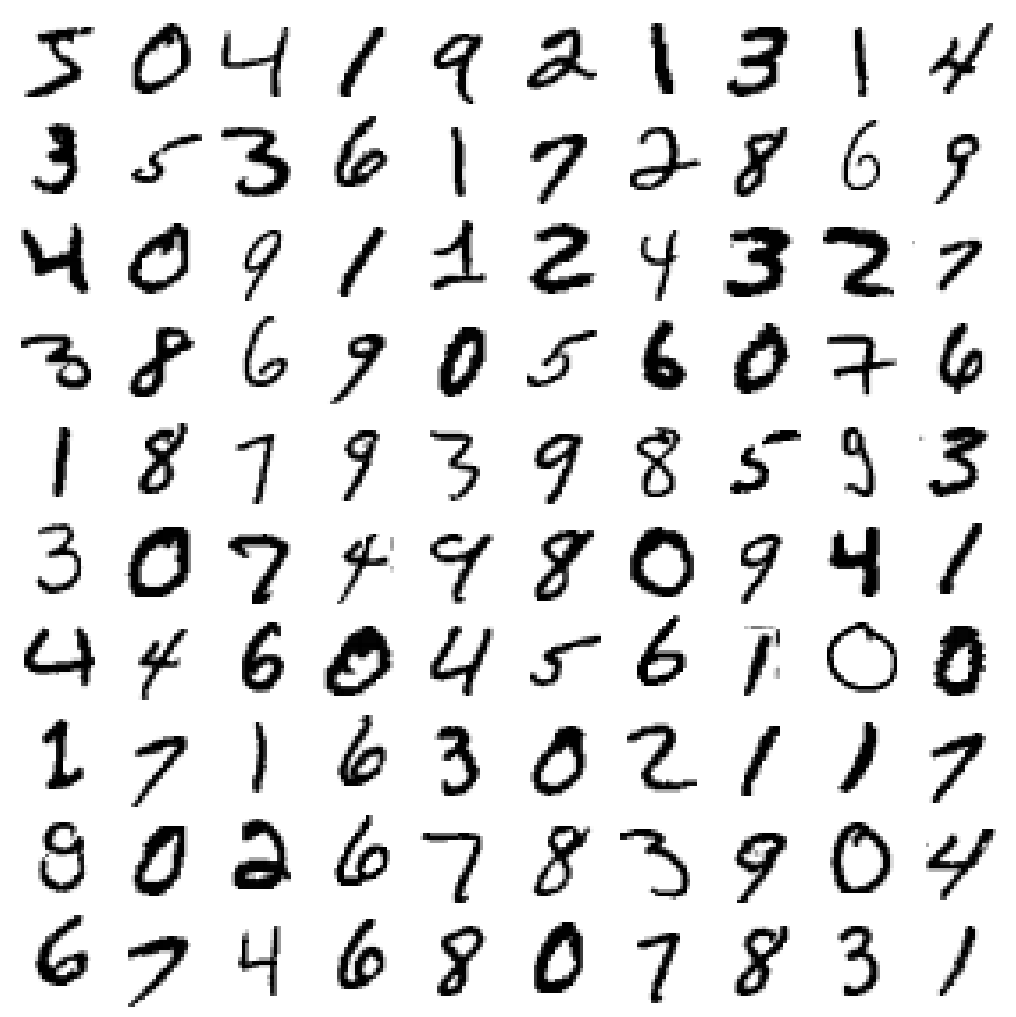

In [4]:
# Crear la figura
plt.figure(figsize=(10, 10))  # tamaño de la figura en pulgadas

for i in range(100):  # 10 x 10 = 100 imágenes
    plt.subplot(10, 10, i + 1)  # 10 filas, 10 columnas
    plt.imshow(X_train[i], cmap=mpl.cm.binary, interpolation="nearest")  # imagen en escala de grises
    plt.axis('off')  # quitar ejes

plt.tight_layout(pad=0.1)  # ajusta los espacios entre imágenes
plt.show()

In [5]:


first_element = X_train[0]
rows, cols = first_element.shape
print(first_element.shape)
print(first_element.ndim)
print(first_element.max())
print(first_element.min())
print(rows * cols)

(28, 28)
2
1.0
0.0
784


In [6]:
# Entrenar modelo
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

d:\PYTHON\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9155 - loss: 0.2945
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9568 - loss: 0.1459
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9661 - loss: 0.1112
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9723 - loss: 0.0894
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9764 - loss: 0.0759
313/313 - 1s - 3ms/step - accuracy: 0.9780 - loss: 0.0772


[0.07716084271669388, 0.9779999852180481]

In [8]:
model.save("model.keras")

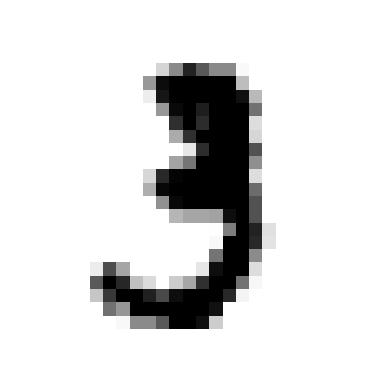

Probabilidades por clase: [1.4961388e-11 1.4077149e-06 5.9509292e-10 9.9967408e-01 1.1668733e-11
 6.7563951e-07 3.5552700e-15 1.5846532e-11 1.1566157e-06 3.2261750e-04]
Predicción: 3


In [9]:
# Tomar una imagen de entrenamiento y normalizarla
sample_img = X_train[10]

# Mostrar la imagen en escala de grises (blanco-negro invertido)
plt.matshow(sample_img, cmap="gray_r")
plt.axis("off")          # Oculta ejes
plt.show()

# Redimensionar para que el modelo espere (batch_size, 28, 28)
sample_input = sample_img.reshape(1, 28, 28)

# Obtener predicciones
probs = model.predict(sample_input, verbose=0)[0]  # vector de 10 probabilidades
pred_class = np.argmax(probs)                      # índice de la mayor probabilidad

print("Probabilidades por clase:", probs)
print(f"Predicción: {pred_class}")



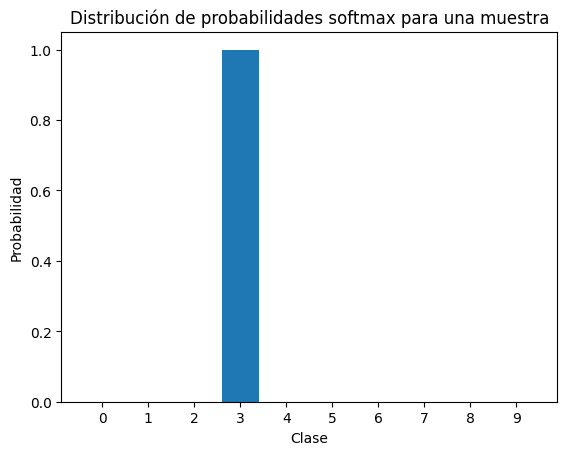

In [10]:
plt.bar(range(10), probs)
plt.xlabel("Clase")
plt.ylabel("Probabilidad")
plt.title("Distribución de probabilidades softmax para una muestra")
plt.xticks(range(10))
plt.show()